In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cf
import pandas as pd 
import numpy as np 
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import datetime

from split_filename import *
from GOLD import *

In [2]:
infile = 'C:\\Users\\Luiz Felipe\\Downloads\\QEUV2019111120191112\\tmp\\archive_L2\\2019\\315\\'
filename = 'GOLD_L2_QEUV_2019_315_v01_r01_c01.nc'



ds = xr.open_dataset(infile + filename)
ds.coords['nscans'] = bytes_string(ds['scan_start_time'])
ds.coords['nmask'] = ds['mask_wavelength']

ds


<xarray.Dataset>
Dimensions:             (nmask: 4001, nscans: 40, ntimes: 92)
Coordinates:
  * nscans              (nscans) object 2019-11-11T10:11:28+00:00 ... 2019-11-11T19:54:02+00:00
  * nmask               (nmask) float32 130.0 130.01 130.02 ... 169.98999 170.0
Dimensions without coordinates: ntimes
Data variables:
    n2_lbh_unc_ran      (nscans, ntimes) float32 ...
    qeuv_unc_ran        (nscans, ntimes) float32 ...
    qeuv_lookup_table   (nscans) |S50 ...
    on2_dqi             (nscans, ntimes) int32 ...
    on2                 (nscans, ntimes) float32 ...
    oi_1356_unc_ran     (nscans, ntimes) float32 ...
    qeuv_unc_sys        (nscans, ntimes) float32 ...
    scan_start_time     (nscans) |S50 b'2019-11-11T10:11:28Z' ... b'2019-11-11T19:54:02Z'
    qeuv                (nscans, ntimes) float32 ...
    solar_zenith_angle  (nscans, ntimes) float32 ...
    on2_unc_sys         (nscans, ntimes) float32 ...
    on2_unc_mod         (nscans, ntimes) float32 ...
    n2_lbh_unc_sys      (nscans, ntimes) float32 ...
    time_utc            (nscans, ntimes) |S50 ...
    input_l1c_file      (nscans) |S50 ...
    radiance_n2_lbh     (nscans, ntimes) float32 ...
    qeuv_dqi            (nscans, ntimes) int32 ...
    hemisphere          (nscans) |S50 ...
    mask_oi_1356        (nmask) int32 ...
    radiance_oi_1356    (nscans, ntimes) float32 ...
    channel             (nscans) |S50 ...
    on2_unc_ran         (nscans, ntimes) float32 ...
    dqi                 (nscans) int32 ...
    qeuv_unc_mod        (nscans, ntimes) float32 ...
    mask_n2_lbh         (nmask) int32 ...
    emission_angle      (nscans, ntimes) float32 ...
    on2_lookup_table    (nscans) |S50 ...
    scan_stop_time      (nscans) |S50 ...
    oi_1356_unc_sys     (nscans, ntimes) float32 ...
    mask_wavelength     (nmask) float32 ...
Attributes:
    Data_revision:               01
    Logical_source:              GOLD_L2_QEUV
    PI_name:                     Richard Eastes
    TEXT:                        The GOLD mission of opportunity flies an ult...
    Mission_group:               GOLD
    Data_version:                01
    Data_type:                   APIDx? > GOLD Application ID 0x?: Level 2 Da...
    Generation_date:             20200215
    date_start:                  2019-11-11T10:11:28Z
    dqi:                         0
    Instrument_type:             UV Imaging Spectrograph (Space)
    PI_affiliation:              University of Colorado/LASP
    Source_name:                 GOLD>Global-scale Observations of the Limb a...
    Data_cycle:                  01
    Acknowledgement:             This is a data product from the NASA Global-...
    Logical_source_description:  GOLD QEUV L2 Daily File
    Discipline:                  Space Physics > Ionospheric Science
    Logical_file_id:             GOLD_L2_QEUV_2019_315_v01_r01_c01
    date_end:                    2019-11-11T20:07:42Z
    Descriptor:                  QEUV>Integrated solar flux < 45 nm
    Project:                     NASA > GOLD
    Software_version:            dafdbd1

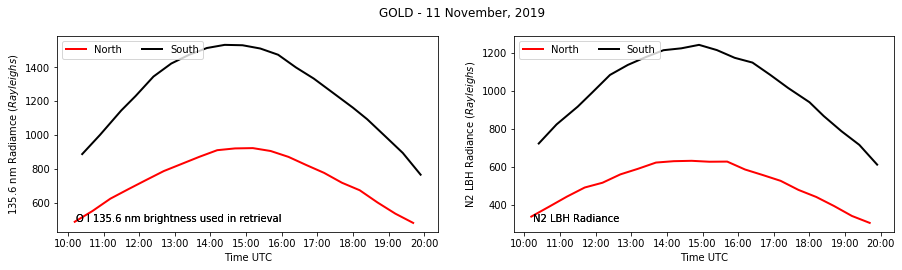

In [6]:
def plotting_hemisphere(ax, 
                        ds, 
                        parameter, 
                        hemisphere, 
                        dim_mean = 'ntimes'):
    
    if hemisphere == 'north':
        num = 0
        color = 'red'
    else:
        num = 1
        color = 'black'
    
    dataset = ds.isel(nscans = np.arange(num, len(ds.nscans), 2))
    
    data = dataset[parameter].mean(dim = dim_mean).to_dataframe()

    data.plot(ax = ax, label = hemisphere.title(), legend = False, color = color, lw = 2)
    
    ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
    ax.xaxis.set_major_locator(dates.HourLocator(interval = 1))

    atributes = dataset[parameter].attrs
    units = atributes['UNITS']

    

    if dim_mean == 'ntimes':
        xlabel = 'Time UTC'
        
    ylabel = f"{atributes['LABLAXIS']} (${units}$)"
        
    date = pd.to_datetime(ds.attrs['date_start']).date().strftime("%d %B, %Y")

    ax.set(ylabel = ylabel, xlabel = xlabel)
    ax.text(0.05, 0.05, atributes['CATDESC'], transform = ax.transAxes)
    ax.legend(['North', 'South'], loc = 'upper left', ncol = 2)

fig, ax = plt.subplots(figsize = (15, 4), ncols = 2, sharex = True)


parameters = ['radiance_oi_1356', 'radiance_n2_lbh']


for ax, parameter in zip(ax.flat, parameters):
    for hemisphere in ['north', 'south']:
        plotting_hemisphere(ax, ds, parameter, hemisphere)

fig.autofmt_xdate(rotation=0, ha = 'center')

date_extent = split_filename(filename).date()

fig.suptitle(f'GOLD - {date_extent}')
plt.show()


In [56]:
parameter_name = 'OI1356_N2LBH'
FigureName = figure_name(filename, parameter_name)
PathOut = 'Figures\\'
fig.savefig(PathOut + FigureName + '.png', dpi = 100, quality = 95, bbox_inches="tight")



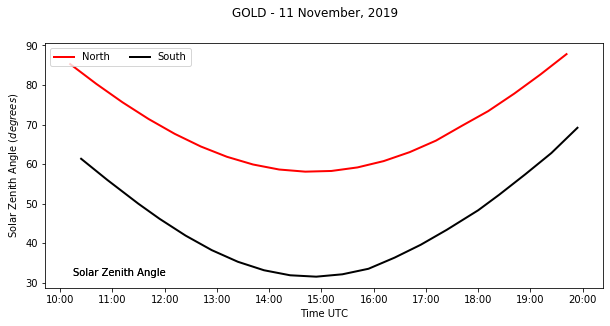

In [8]:
fig, ax = plt.subplots(figsize = (10, 5))

parameter = 'solar_zenith_angle' #'qeuv'

for hemisphere in ['north', 'south']:
    plotting_hemisphere(ax, ds, parameter, hemisphere)
    
fig.autofmt_xdate(rotation=0, ha = 'center')

fig.suptitle(f'GOLD - {date_extent}')
plt.show()

In [49]:
def figure_name(files, emission):
    
    emission = emission.replace(' ', '_')
    
    if isinstance(files, list):
    
        start = split_filename(files[0][0])
        end = split_filename(files[-1][0])
        time_start, time_end = start.time().replace(':',''), end.time().replace(':','')
        return f"GOLD_{start.product}_{emission}_{date}_{time_start}_{time_end}"
    else:
        start = split_filename(filename)
        if start.level == 'L2':
             return f"GOLD_{emission.upper()}_{start.level}_{str(start.date(extent = False)).replace('-', '_')}"
        


FigureName = figure_name(filename, parameter)
